# Visualization: Bar, Swarm, or Violin plots

##### Bar/swarm/violin plots: These plots can be utilized to compare different features, such as the engagement metrics, between different categories or groups. For instance, you can create bar, swarm or violin plots to compare the average number of engagements for tweets spreading misinformation/disinformation before and after the release of fact-checking articles.

## Initializations

* Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

* Load the cleaned dataset into a pandas DataFrame:

In [2]:
df = pd.read_csv("cleaned_dataset.csv")

* Convert the "Date posted" column to datetime format:

In [3]:
df["Date posted"] = pd.to_datetime(df["Date posted"])

## Plotting Bar plots

* Extract relevant columns from your dataset based on the release of fact checking articles

In [4]:
fact_checking_release_date = pd.to_datetime("2019-04-25")
engagement_metrics_before = df[df['Date posted'] < fact_checking_release_date][['Likes', 'Replies', 'Retweets', 'Quote Tweets']]
engagement_metrics_after = df[df['Date posted'] >= fact_checking_release_date][['Likes', 'Replies', 'Retweets', 'Quote Tweets']]

* Calculate the average number of engagements for each group

In [5]:
avg_engagement_before = engagement_metrics_before.mean()
avg_engagement_after = engagement_metrics_after.mean()

* Define the engagement metric labels

In [6]:
engagement_labels = ['Likes', 'Replies', 'Retweets', 'Quote Tweets']

* Set the positions of the bars on the x-axis

In [7]:
x = np.arange(len(engagement_labels))

* Create the bar plots

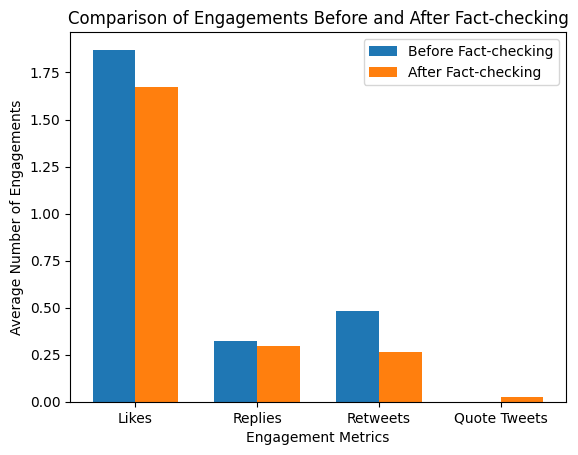

In [10]:
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, avg_engagement_before, width, label='Before Fact-checking')
bars2 = ax.bar(x + width/2, avg_engagement_after, width, label='After Fact-checking')

ax.set_xlabel('Engagement Metrics')
ax.set_ylabel('Average Number of Engagements')
ax.set_title('Comparison of Engagements Before and After Fact-checking')
ax.set_xticks(x)
ax.set_xticklabels(engagement_labels)
ax.legend()

# Show the plot
plt.show()


##### In this code:

1. The engagement_metrics_before and engagement_metrics_after variables extract the relevant columns (Likes, Replies, Retweets, Quote Tweets) from your dataset based on the condition of the date posted.
2. The average number of engagements (avg_engagement_before and avg_engagement_after) is calculated for each group.
3. The engagement metric labels (engagement_labels) are defined.
4. The positions of the bars on the x-axis (x) are set using np.arange().
5. The bar plots (bars1 and bars2) are created using plt.bar().
6. Labels, title, and legend are added to the plot.
7. The plot is displayed using plt.show().

## Plotting Swarm or Violin Plots

* Extract relevant columns from your dataset based on the release of fact checking articles (But we already did this earlier so no need to repeat)

* Combine the engagement metrics before and after into a single dataframe

In [11]:
combined_metrics = pd.concat([engagement_metrics_before, engagement_metrics_after])
combined_metrics['Group'] = np.where(df['Date posted'] < fact_checking_release_date, 'Before Fact-checking', 'After Fact-checking')

* Melt the dataframe for plotting

In [12]:
melted_metrics = pd.melt(combined_metrics, id_vars='Group', var_name='Engagement Metrics', value_name='Number of Engagements')

* Create the swarm plot

/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 44.8% of the points cannot be plac

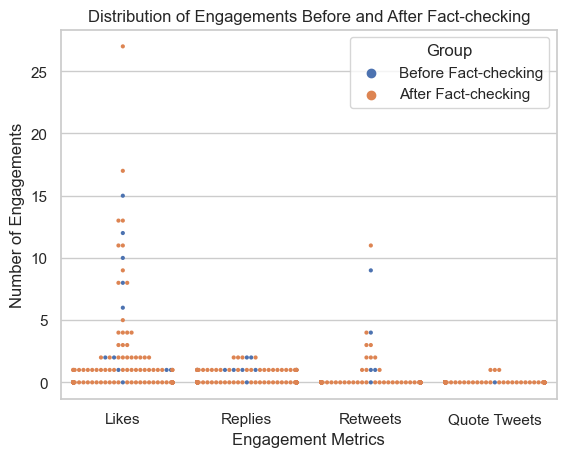

In [21]:
sns.set(style="whitegrid")
sns.swarmplot(x="Engagement Metrics", y="Number of Engagements", hue="Group", data=melted_metrics, size=3)
#sns.violinplot(x="Engagement Metrics", y="Number of Engagements", hue="Group", data=melted_metrics)

# Add labels and title
plt.xlabel('Engagement Metrics')
plt.ylabel('Number of Engagements')
plt.title('Distribution of Engagements Before and After Fact-checking')

# Show the plot
plt.show()

* Create the Violin plot

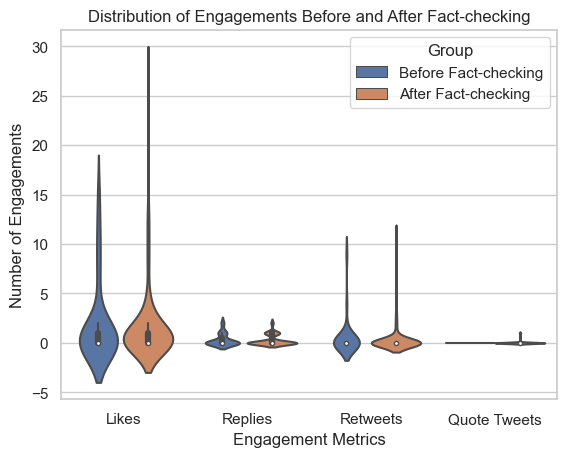

In [14]:
sns.set(style="whitegrid")
# sns.swarmplot(x="Engagement Metrics", y="Number of Engagements", hue="Group", data=melted_metrics)
sns.violinplot(x="Engagement Metrics", y="Number of Engagements", hue="Group", data=melted_metrics)

# Add labels and title
plt.xlabel('Engagement Metrics')
plt.ylabel('Number of Engagements')
plt.title('Distribution of Engagements Before and After Fact-checking')

# Show the plot
plt.show()

##### In this code:

1. The engagement_metrics_before and engagement_metrics_after variables extract the relevant columns (Likes, Replies, Retweets, Quote Tweets) from your dataset based on the condition of the date posted.
2. The engagement metrics before and after are combined into a single dataframe (combined_metrics) and a new column 'Group' is added to distinguish between the two groups.
3. The dataframe is melted using pd.melt() to prepare it for plotting.
4. Either a swarm plot (sns.swarmplot()) or a violin plot (sns.violinplot()) can be created. Uncomment the desired line based on your preference.
5. Labels and title are added to the plot using plt.xlabel(), plt.ylabel(), and plt.title().
6. The plot is displayed using plt.show().